<a href="https://colab.research.google.com/github/nikesh11xx/machine-learning-algorithm_/blob/main/LinearRegressioon_implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# !pip install datasets
# from sklearn.datasets import load_boston

In [9]:
df = pd.read_csv('/content/Boston_Housing.csv')
df.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [11]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
# independent features and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
# standarding the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn.model_selection import cross_val_score


In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
mse = cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=20)

lr.fit(X_train,y_train)

LinearRegression()

In [44]:
np.mean(mse)

-25.3486680386738

In [45]:
y_pred = lr.predict(X_test)

<ipython-input-49-3a9b7e117820>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred - y_test)


<Axes: ylabel='Density'>

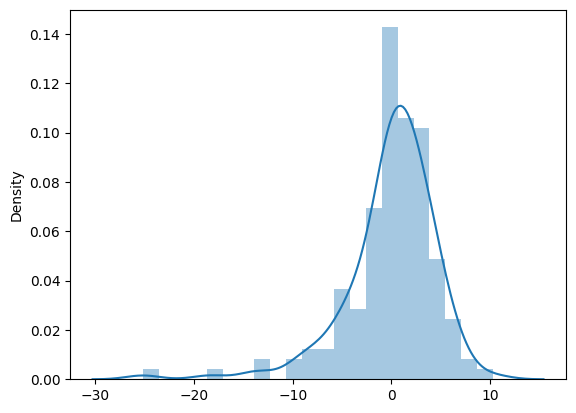

In [49]:
sns.distplot(y_pred - y_test)

In [52]:
from sklearn.metrics import r2_score
score= r2_score(y_pred,y_test)
score

0.6693702691495593